In [279]:
# Connect colab with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [280]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
import warnings
warnings.filterwarnings('ignore')

In [282]:
# Read static dataset
df = pd.read_csv("/content/drive/MyDrive/AI_CS/Static_dataset.csv")

In [283]:
# Show first five rows of the dataset 
df.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


#Data Analysis: 

## Number of columns and rows in dataset

In [284]:
df.shape

(268074, 16)

In [285]:
# The columns in the data set
for column in df.columns:
  print(column)

timestamp
FQDN_count
subdomain_length
upper
lower
numeric
entropy
special
labels
labels_max
labels_average
longest_word
sld
len
subdomain
Target Attack


##The distribution of each feature and the target variable

In [286]:
df.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

Not all columns are numeric, we will deal with it in next steps.

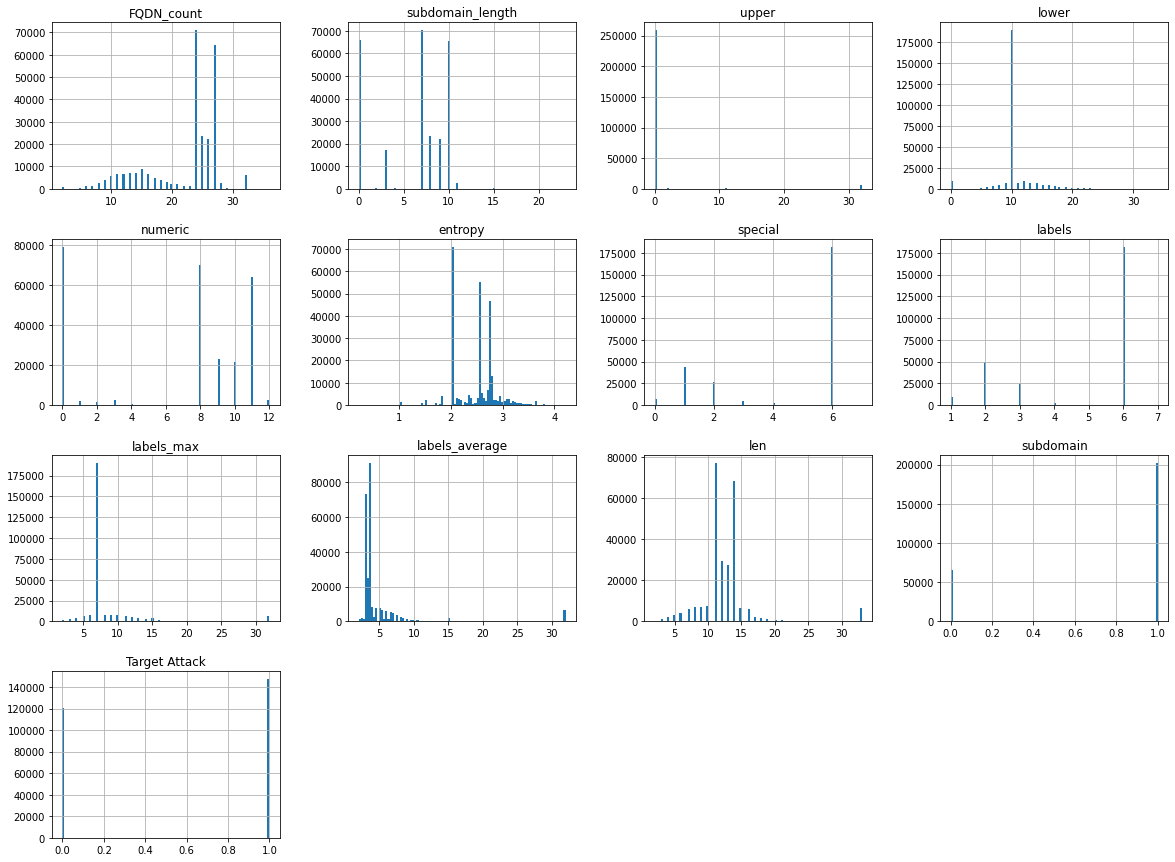

In [288]:
df.hist(bins=100, figsize=(20,15))
plt.show()

The features have different distribution.

In [289]:
df['upper'].value_counts()

0     258759
32      6345
11      1961
2       1008
8          1
Name: upper, dtype: int64

In [290]:
df['subdomain'].value_counts()

1    201993
0     66081
Name: subdomain, dtype: int64

In [291]:
df['labels'].value_counts()

6    182035
2     49983
3     24029
1      9582
4      2323
5       116
7         6
Name: labels, dtype: int64

## Draw the number of values in each class to see if the data is balanced or imbalanced

In [292]:
df['Target Attack'].value_counts()

1    147179
0    120895
Name: Target Attack, dtype: int64

### Pie plot

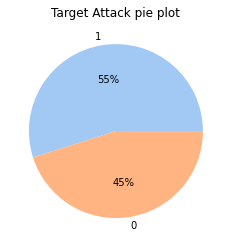

In [293]:
#define data
data = df['Target Attack'].value_counts()
labels = df['Target Attack'].unique()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Target Attack pie plot")
plt.show()

### Bar plot

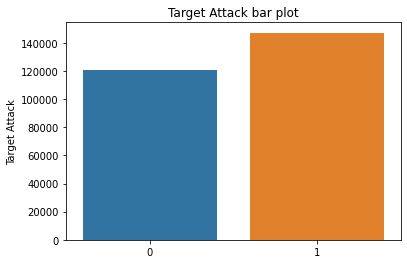

In [294]:
plt.title("Target Attack bar plot")
sns.barplot(x=labels, y=data)

The data set is balanced.

### Data skewed pattern

In [295]:
df2 = df.loc[:, df.columns != 'Target Attack']

In [296]:
df.skew()

FQDN_count         -1.101731
subdomain_length   -0.590480
upper               5.988737
lower               0.343449
numeric            -0.594384
entropy            -0.140156
special            -0.902972
labels             -0.903680
labels_max          3.979910
labels_average      5.087081
len                 2.634801
subdomain          -1.176397
Target Attack      -0.197046
dtype: float64

The features has different skewed as some of it are right and other are left skewed.

# Feature engineering and data cleaning

## Check for missing values

In [297]:
df.isna().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

There is 8 missing values in longest_word , this is a very small number so I will remove them.

In [298]:
df.dropna()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,alma,almaalomah,14,1,0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,radio,radio-vintage,14,0,0


## Check for missing values and categorical

In [299]:
df.dtypes

timestamp            object
FQDN_count            int64
subdomain_length      int64
upper                 int64
lower                 int64
numeric               int64
entropy             float64
special               int64
labels                int64
labels_max            int64
labels_average      float64
longest_word         object
sld                  object
len                   int64
subdomain             int64
Target Attack         int64
dtype: object

In [300]:
df['timestamp'].value_counts()

49:26.7    46
49:27.5    43
49:27.1    42
49:27.4    39
49:26.9    35
           ..
07:14.4     1
07:37.6     1
42:38.8     1
06:55.0     1
00:40.7     1
Name: timestamp, Length: 35924, dtype: int64

In [301]:
df['longest_word'].value_counts()

2          109981
4           70188
N            4498
C            2969
9            1906
            ...  
yaa             1
queue           1
kit             1
airdrop         1
mal             1
Name: longest_word, Length: 6224, dtype: int64

In [302]:
df['sld'].value_counts()

192                                 109517
224                                  70188
FHEPFCELEHFCEPFFFACACACACACACABN      4498
DESKTOP-3JF04TC                       1961
239                                   1906
                                     ...  
freesgift                                1
secureserver                             1
airdropalert                             1
queue-it                                 1
lahemal                                  1
Name: sld, Length: 11112, dtype: int64

## Encoding Categorical Features

In [303]:
from sklearn.preprocessing import LabelEncoder
df['sld'] = df[['sld']].apply(LabelEncoder().fit_transform)
df['longest_word'] = df[['longest_word']].apply(LabelEncoder().fit_transform)
df['timestamp'] = df[['timestamp']].apply(LabelEncoder().fit_transform)

In [304]:
df.dtypes

timestamp             int64
FQDN_count            int64
subdomain_length      int64
upper                 int64
lower                 int64
numeric               int64
entropy             float64
special               int64
labels                int64
labels_max            int64
labels_average      float64
longest_word          int64
sld                   int64
len                   int64
subdomain             int64
Target Attack         int64
dtype: object

## Split Features and label

In [305]:
X = df.drop(labels = "Target Attack", axis=1) 
X

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,33728,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1
1,4433,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1
2,13928,26,9,0,10,10,2.742338,6,6,7,3.500000,2,35,13,1
3,2917,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1
4,7622,15,9,0,11,0,2.929439,4,3,5,4.333333,3143,5622,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,20282,18,3,0,16,0,2.338623,2,3,10,5.333333,169,481,14,1
268070,21591,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1
268071,22381,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1
268072,14628,16,0,0,14,0,3.249687,2,2,13,7.500000,4463,7880,14,0


In [306]:
X.dtypes

timestamp             int64
FQDN_count            int64
subdomain_length      int64
upper                 int64
lower                 int64
numeric               int64
entropy             float64
special               int64
labels                int64
labels_max            int64
labels_average      float64
longest_word          int64
sld                   int64
len                   int64
subdomain             int64
dtype: object

In [307]:
y = df["Target Attack"]
y

0         1
1         1
2         0
3         1
4         1
         ..
268069    0
268070    0
268071    1
268072    0
268073    1
Name: Target Attack, Length: 268074, dtype: int64

## Split the dataset into Train and Test dataset

In [308]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42,stratify=y)

# Feature Filtering/Selection:

Filter criteria for selecting the best feature

Select independent features with

* High correlation with the target variable,
* Higher information gain or mutual information of the independent variable,
* Anova f-test.

## Finding correlation with target variable of independent predictors:

In [309]:
#Create a data set copy with all the input features including target variable
full_data= X.copy()
full_data["label"]= y
print(full_data.head(2))


   timestamp  FQDN_count  subdomain_length  upper  lower  numeric   entropy  \
0      33728          27                10      0     10       11  2.570417   
1       4433          27                10      0     10       11  2.767195   

   special  labels  labels_max  labels_average  longest_word  sld  len  \
0        6       6           7        3.666667             2   35   14   
1        6       6           7        3.666667             2   35   14   

   subdomain  label  
0          1      1  
1          1      1  


In [310]:
full_data.columns.values

array(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain',
       'label'], dtype=object)

In [311]:
#the correlation of each of the input feature with the target variable
imp = full_data.drop("label", axis=1).apply(lambda x: x.corr(full_data.label))
print(imp)

timestamp           0.008345
FQDN_count          0.563563
subdomain_length    0.572053
upper               0.072895
lower              -0.295599
numeric             0.599252
entropy            -0.119050
special             0.582107
labels              0.569414
labels_max         -0.096350
labels_average     -0.077167
longest_word       -0.555636
sld                -0.553529
len                 0.159437
subdomain           0.502469
dtype: float64


In [312]:
indices = np.argsort(imp)
print(indices)


timestamp           11
FQDN_count          12
subdomain_length     4
upper                6
lower                9
numeric             10
entropy              0
special              3
labels              13
labels_max          14
labels_average       1
longest_word         8
sld                  2
len                  7
subdomain            5
dtype: int64


In [313]:
print(imp[indices])     #Sorted in ascending order

longest_word       -0.555636
sld                -0.553529
lower              -0.295599
entropy            -0.119050
labels_max         -0.096350
labels_average     -0.077167
timestamp           0.008345
upper               0.072895
len                 0.159437
subdomain           0.502469
FQDN_count          0.563563
labels              0.569414
subdomain_length    0.572053
special             0.582107
numeric             0.599252
dtype: float64


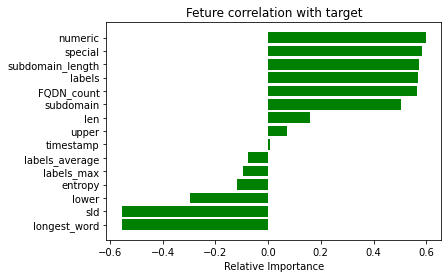

In [314]:
import matplotlib.pyplot as plt

names=full_data.columns.values


#Plotting horizontal bar graph
plt.barh(range(len(indices)), imp[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feture correlation with target')
plt.show()

In [315]:
#I keep features only if the correlation of the feature with the target variable is greater than 0.2
for i in range(0, len(indices)):
    if np.abs(imp[i])>0.2:
        print(names[i])

FQDN_count
subdomain_length
lower
numeric
special
labels
longest_word
sld
subdomain


## Mutual Information or Information Gain

In [316]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y);

Text(0.5, 1.0, 'Mutual Information')

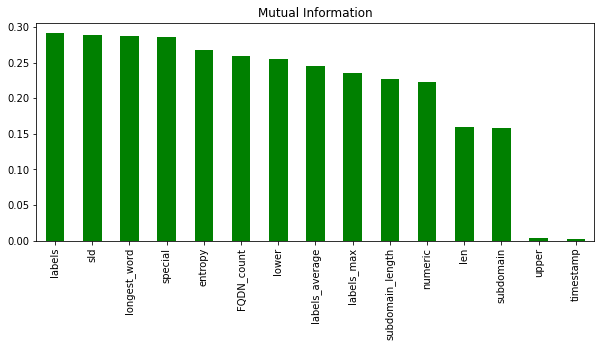

In [317]:
# Plotting the mutual information

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4),color='g')
plt.title("Mutual Information")

## ANOVA f-test Feature Selection

In [318]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)
# transform test input data
X_test_fs = fs.transform(x_test)

In [319]:
x_train.columns.values

array(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain'],
      dtype=object)

In [320]:
# what are scores for the features
for i,name in zip(range(len(fs.scores_)), x_train.columns.values):
	print('Feature %d %s: %f' % (i, name,fs.scores_[i]))

Feature 0 timestamp: 15.603524
Feature 1 FQDN_count: 93523.374866
Feature 2 subdomain_length: 97840.791670
Feature 3 upper: 1045.998894
Feature 4 lower: 19071.106394
Feature 5 numeric: 112725.099441
Feature 6 entropy: 2878.764926
Feature 7 special: 103111.662769
Feature 8 labels: 96468.277526
Feature 9 labels_max: 1870.532610
Feature 10 labels_average: 1208.952003
Feature 11 longest_word: 89612.920675
Feature 12 sld: 88890.140106
Feature 13 len: 5220.838293
Feature 14 subdomain: 67932.896522


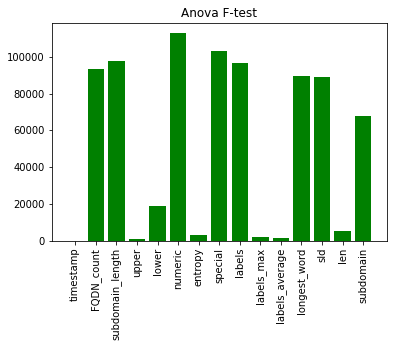

In [321]:
# plot the scores
plt.bar([i for i in  x_train.columns.values], fs.scores_,color='g')
plt.title('Anova F-test')
plt.xticks(rotation = 90) 

plt.show()

## Last Feature Selected

In [322]:
X_selection = X.drop(labels = ["entropy", "labels_max", "labels_average", 'upper', 'labels_average','len',"timestamp"], axis=1) 

## The selected features

In [323]:
X_selection.columns

Index(['FQDN_count', 'subdomain_length', 'lower', 'numeric', 'special',
       'labels', 'longest_word', 'sld', 'subdomain'],
      dtype='object')

# Model Training:

## Split data after feature selection 

In [324]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X_selection,y, test_size=0.25, random_state=42,stratify=y)

## Normalization with Sklearn

In [325]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(x_train_s)
X_test_scaled = scaler.transform(x_test_s) 

## Logistic Regression without normalization

In [326]:
from sklearn.linear_model import LogisticRegression

In [327]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(max_iter=1500,  random_state=42)

In [328]:
logisticRegr.fit(x_train_s, y_train_s)

LogisticRegression(max_iter=1500, random_state=42)

In [329]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test_s, y_test_s)
print(score)

0.8244975305510378


In [330]:
from sklearn import metrics
y_pred = logisticRegr.predict(x_test_s)


In [354]:
y_log_proba =  logisticRegr.predict_proba(X_test_scaled) 

In [331]:
print(metrics.classification_report(y_test_s,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76     30224
           1       0.76      1.00      0.86     36795

    accuracy                           0.82     67019
   macro avg       0.88      0.81      0.81     67019
weighted avg       0.86      0.82      0.82     67019



This is the winner model

## Logistic Regression with normalization

In [332]:
logisticRegr2 = LogisticRegression(max_iter=1500,  random_state=42)
logisticRegr2.fit(X_train_scaled, y_train_s)

LogisticRegression(max_iter=1500, random_state=42)

In [333]:
# Use score method to get accuracy of model
score2 = logisticRegr2.score(X_test_scaled, y_test_s)
print(score2)

0.8156045300586401


In [334]:
y_pred2 = logisticRegr2.predict(X_test_scaled)

In [336]:
print(metrics.classification_report(y_test_s,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.63      0.75     30224
           1       0.76      0.97      0.85     36795

    accuracy                           0.82     67019
   macro avg       0.85      0.80      0.80     67019
weighted avg       0.84      0.82      0.81     67019



## Naive Baise without Normalization

In [337]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(x_train_s, y_train_s)

GaussianNB()

In [338]:
# Use score method to get accuracy of model
scoreGnb1 = gnb.score(x_test_s, y_test_s)
print(scoreGnb1)

0.8030260075500978


In [339]:
y_pred21 = gnb.predict(x_test_s)


In [340]:
print(metrics.classification_report(y_test_s,y_pred21))

              precision    recall  f1-score   support

           0       0.90      0.64      0.74     30224
           1       0.76      0.94      0.84     36795

    accuracy                           0.80     67019
   macro avg       0.83      0.79      0.79     67019
weighted avg       0.82      0.80      0.80     67019



## Naive Baise  with Normalization

In [341]:
gnb2 = GaussianNB()

gnb2.fit(X_train_scaled, y_train_s)

GaussianNB()

In [342]:
# Use score method to get accuracy of model
scoreGnb2 = gnb2.score(X_test_scaled, y_test_s)
print(scoreGnb2)

0.8029812441248004


In [343]:
y_pred22 = gnb2.predict(X_test_scaled)


In [344]:
print(metrics.classification_report(y_test_s,y_pred22))

              precision    recall  f1-score   support

           0       0.90      0.64      0.74     30224
           1       0.76      0.94      0.84     36795

    accuracy                           0.80     67019
   macro avg       0.83      0.79      0.79     67019
weighted avg       0.82      0.80      0.80     67019



## Evaluation

## Receiver Operating Characteristic (ROC) Curve

In [345]:
# please run this cell 
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


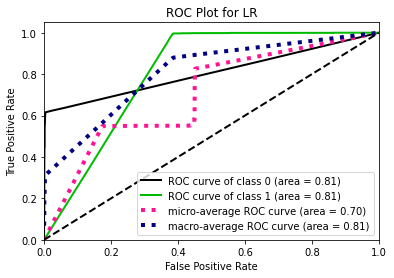

In [355]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test_s, y_log_proba, title = 'ROC Plot for LR')

## Precision Recall Curve (PR Curve)

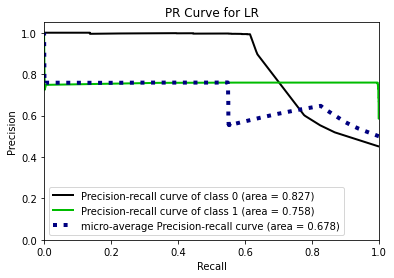

In [356]:
skplt.metrics.plot_precision_recall(y_test_s, y_log_proba, title = 'PR Curve for LR')

## Confusion Matrix

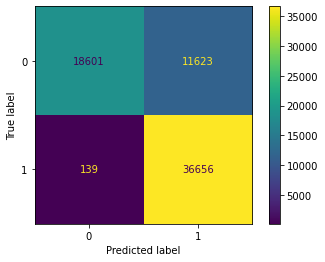

In [360]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logisticRegr, x_test_s, y_test_s)  

#Save LR model

In [349]:
# save the model to disk
import pickle

filename = 'finalized_model.sav'
pickle.dump(logisticRegr, open(filename, 'wb'))

In [350]:
# If you want to read the model again
# import pickle
# filename = 'finalized_model.sav'
# static_model = pickle.load(open(filename, 'rb'))